### Québriac Jeanne 21302745

# Mini-projet 4: Le pendule

On s'intéressera ici au mouvement du pendule et comment modéliser son déplacement.

### On importe les bibliothèques utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Partie 1: Approximation des petits angles

Equation du mouvement libre d'un pendule simple:
$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
$\theta(t)$ l'angle que fait un pendule par rapport à la verticale.

On considère que l'angle $\theta(t)$ est petit donc on peut réécrire l'équation:
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$$

On a:
* $\Omega=\sqrt{{g/l}}$ la pulsation propre et on utilisera $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$
* $q$ est le terme de frottement fluide

Le but de cette partie est de résoudre l'équation ci-dessus avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et de tracer sur un même graphe l'évolution de $\theta(t)$, dans ces régimes respectivement pseudo-périodique, critique et apériodique avec des conditions initiales imposées.

On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

Pour résoudre cette équation, on effectu des changements de variable telle que $u_0$=$\theta$ et $u_1=d\theta/dt$

On obtient finalement $du_1/dt=-qu_1-\Omega^2u_0$

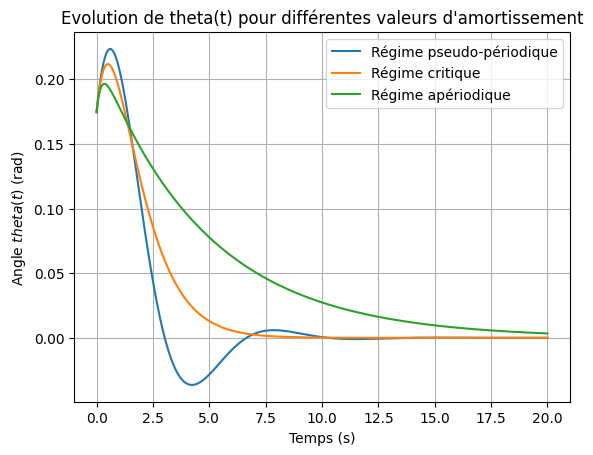

In [2]:
#Paramètres
q_values=[1,2,5] #s^-1
step=0.05 #s
ti=0 #s
te=20 #s
omega=1 #rad/s
ordre=2

#Condition initiale
teta0=np.radians(10) #rad

#Dérivée de teta
def derivee_u(u,t,q_values):
    du=np.zeros(u.shape)
    du[0]=u[1]
    du[1]=-q_values*u[1]-omega**2*u[0]
    return du

# Méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre, q_values):
    interval=end-start
    num_points=int(interval/step)+1
    t=np.linspace(start,end,num_points)
    
    v=np.zeros((ordre,num_points))
    v[:,0]=v_ini
    
    for i in range(num_points - 1):
        d1 = derivee_u(v[:, i], t[i], q_values)
        d2 = derivee_u(v[:, i] + step / 2 * d1, t[i] + step / 2, q_values)
        d3 = derivee_u(v[:, i] + step / 2 * d2, t[i] + step / 2, q_values)
        d4 = derivee_u(v[:, i] + step * d3, t[i] + step, q_values)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
        
    return t, v

t, Drk4_1 = rk4(ti, te, step, teta0, derivee_u, ordre,q_values[0])
t, Drk4_2 = rk4(ti, te, step, teta0, derivee_u, ordre,q_values[1])
t, Drk4_5 = rk4(ti, te, step, teta0, derivee_u, ordre,q_values[2])

plt.plot(t,Drk4_1[0],label="Régime pseudo-périodique")
plt.plot(t,Drk4_2[0],label="Régime critique")
plt.plot(t,Drk4_5[0],label="Régime apériodique")
plt.xlabel("Temps (s)")
plt.ylabel("Angle $theta(t)$ (rad)")
plt.title("Evolution de theta(t) pour différentes valeurs d'amortissement")
plt.grid()
plt.legend()
plt.show()

## Partie 2: Force d'excitation

On ajoute maintenant une force d'excitation au pendule de sorte que l'équation du mouvement s'écrive : 

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Le but de cette nouvelle partie est de résoudre cette nouvelle équation avec la méthode RK4 pour une pulsation $\Omega_e=\frac{2\Omega}{3}$ et une force excitatrice variable et de tracer sur un même graphe la trajectoire dans l'espace des phase $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ du pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$).

On prendra toujours comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

Pour résoudre l'équation, on effectu les mêmes changements de variable que précédément et on obtient finalement $du_1/dt=F_e*sin(\omega*t)-qu_1-\Omega^2u_0$

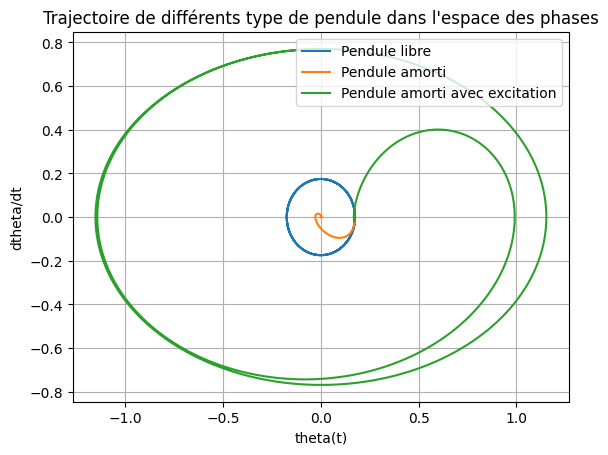

In [3]:
omega_e=2*omega/3

v_ini=np.array([teta0,0])

q=[0,1,1] #s^-1
Fe=[0,0,1] #rad/s

def derivee_w(u,t,q,Fe):
    theta,w=u
    dtheta_dt=w
    dw_dt=-q*w-omega**2*theta+Fe*np.sin(omega_e*t)
    return np.array([dtheta_dt,dw_dt])

def rk4_bis(start, end, step, v_ini, derivee, ordre,q,Fe):
    interval=end-start
    num_points=int(interval/step)+1
    t=np.linspace(start,end,num_points)
    v=np.zeros((ordre,num_points))
    v[:,0]=v_ini
    
    for i in range(num_points - 1):
        d1 = derivee(v[:,i], t[i],q,Fe)
        d2 = derivee(v[:,i] + step / 2 * d1, t[i] + step / 2,q,Fe)
        d3 = derivee(v[:,i] + step / 2 * d2, t[i] + step / 2,q,Fe)
        d4 = derivee(v[:,i] + step * d3, t[i] + step,q,Fe)
        v[:,i+1] = v[:,i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
        
    return t,v

t, Drk4bis_1 = rk4_bis(ti, te, step, v_ini, derivee_w, ordre, q[0], Fe[0])
t, Drk4bis_2 = rk4_bis(ti, te, step, v_ini, derivee_w, ordre, q[1], Fe[1])
t, Drk4bis_3 = rk4_bis(ti, te, step, v_ini, derivee_w, ordre, q[2], Fe[2])

plt.plot(Drk4bis_1[0],Drk4bis_1[1],label="Pendule libre")
plt.plot(Drk4bis_2[0],Drk4bis_2[1],label="Pendule amorti")
plt.plot(Drk4bis_3[0],Drk4bis_3[1],label="Pendule amorti avec excitation")
plt.xlabel("theta(t)")
plt.ylabel("dtheta/dt")
plt.title("Trajectoire de différents type de pendule dans l'espace des phases")
plt.grid()
plt.legend()

**Pendule libre:**
* Le pendule oscille sans perdre d'énergie donc il oscille indéfiniment

**Pendule amorti:**
* L'amplitude des oscillations diminues progressivement jusqu'à disparition dû à l'amortissement qui dissipe l'énergie

**Pendule amorti avec excitation:**
* L'excitation permet la continuité des oscillations malgrés l'amortissement    

## Partie 3: Mouvement chaotique

Dans cette partie, on ne fait plus l'hypothèse des petits angles donc la relation devient:
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Ici, le but est de résoudre l'équation du mouvement devenue non linéaire avec la métode RK4 pour les valeurs $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$ de l'amplitude d'excitation et avec les mêmes conditions initiales et paramètres que précédément. On tracera $\theta(t)$ sur un temps de $100\mathrm{~s}$ en maintenant l'angle $\theta$ dans l'intervalle $[-\pi;\pi]$

Pour résoudre l'équation, on effectue exactement les mêmes étapes qu'à la partie 2 sauf qu'ici on ferra varier $F_e$

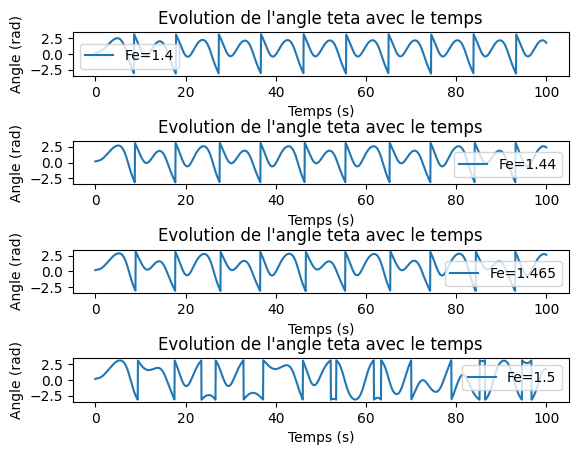

In [8]:
#Dérivée de teta
Fe_bis=[1.4,1.44,1.465,1.5]
q_bis=0.5
tf=100

def derivee_x(u,t,Fe):
    theta,x=u
    dtheta_dt=x
    dx_dt=-q_bis*x-omega**2*np.sin(theta)+Fe*np.sin(omega_e*t)
    return np.array([dtheta_dt,dx_dt])

# Méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre,Fe_bis):
    interval=end-start
    num_points=int(interval/step)+1
    t=np.linspace(start,end,num_points)
    
    v=np.zeros((ordre,num_points))
    v[:,0]=v_ini
    
    for i in range(num_points - 1):
        d1 = derivee_x(v[:, i], t[i],Fe_bis)
        d2 = derivee_x(v[:, i] + step / 2 * d1, t[i] + step / 2,Fe_bis)
        d3 = derivee_x(v[:, i] + step / 2 * d2, t[i] + step / 2,Fe_bis)
        d4 = derivee_x(v[:, i] + step * d3, t[i] + step,Fe_bis)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
        v[0, i + 1] = (v[0, i + 1] + np.pi) % (2 * np.pi) - np.pi
    return t, v

t, Drk4_4 = rk4(ti, tf, step, teta0, derivee_x, ordre,Fe_bis[0])
t, Drk4_44 = rk4(ti, tf, step, teta0, derivee_x, ordre,Fe_bis[1])
t, Drk4_465 = rk4(ti, tf, step, teta0, derivee_x, ordre,Fe_bis[2])
t, Drk4_15 = rk4(ti, tf, step, teta0, derivee_x, ordre,Fe_bis[3])

plt.subplot(4,1,1)
plt.plot(t,Drk4_4[0],label="Fe=1.4")
plt.xlabel("Temps (s)")
plt.ylabel("Angle (rad)")
plt.title("Evolution de l'angle teta avec le temps")
plt.legend()

plt.subplot(4,1,2)
plt.plot(t,Drk4_44[0],label="Fe=1.44")
plt.xlabel("Temps (s)")
plt.ylabel("Angle (rad)")
plt.title("Evolution de l'angle teta avec le temps")
plt.legend()

plt.subplot(4,1,3)
plt.plot(t,Drk4_465[0],label="Fe=1.465")
plt.xlabel("Temps (s)")
plt.ylabel("Angle (rad)")
plt.title("Evolution de l'angle teta avec le temps")
plt.legend()

plt.subplot(4,1,4)
plt.plot(t,Drk4_15[0],label="Fe=1.5")
plt.xlabel("Temps (s)")
plt.ylabel("Angle (rad)")
plt.title("Evolution de l'angle teta avec le temps")
plt.legend()

plt.subplots_adjust(hspace=1.5)

On remarque que la force excitatitrice modifie la période du pendule et que plus la force excitatrice augmente, plus la période du pendule devient chaotique, on l'observe d'autant plus avec $F_e$=1.5

On essaye de voir dorénavant si les condition initiales rende sensible la période du pendule pour une période chaotique dû à la force excitatrice élevée.
On se place dans le cas 𝐹𝑒=1.5 rad⋅s−2 et on calcule l'évolution de 𝜃(𝑡) pour deux conditions initiales très proches l'une de l'autre : 𝜃(𝑡=0)=10 ° et 𝜃(𝑡=0)=9.999 °

In [25]:
# Pour theta(0)=9.999 °
theta9=np.radians(9.999)
t, Drk4_159 = rk4(ti, tf, step, theta9, derivee_x, ordre,Fe_bis[3])

#Pour theta(0)=10°
t, Drk4_15 = rk4(ti, tf, step, teta0, derivee_x, ordre,Fe_bis[3])

On trace alors la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique pour observer l'influence des conditions inititiales.

Text(0.5, 1.0, 'Evolution de la différence en valeur absolue avec le temps')

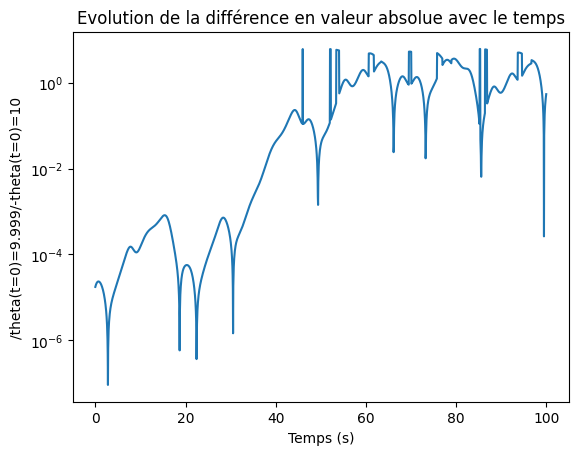

In [26]:
val_abs=np.abs(Drk4_159[0]-Drk4_15[0])

plt.semilogy(t,val_abs)
plt.xlabel("Temps (s)")
plt.ylabel("/theta(t=0)=9.999/-theta(t=0)=10")
plt.title("Evolution de la différence en valeur absolue avec le temps")

On observe difficile une évolution sous forme d'une droite au début puis un comportement totalement chaotique dû au fait que $\theta$ est borné) de la courbe qui correspond à une oscillation aléatoire.
Cela prouve que le comportement de la période est bien chaotique pour une force excitatrice de 1.5.

## Conclusion

* On a pu résoudre les équations différentielles du mouvement d'un pendule grâce à la méthode RK4
* Grâce aux graphes on a visualisé l'évolution de la trajectoire d'un pendule et on a observé les différents régimes du pendule
* On a pu remarquer que plus la force excitatrice est grande, plus la période du pendule devient chaotique